## Task-C: Regression outlier effect.

<font face='georgia'> <h3> Objective:Visualization best fit linear regression line for different scenarios</h3> </font>

In [1]:
# you should not import any other packages
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.linear_model import SGDRegressor

In [2]:
import numpy as np
import scipy as sp
import scipy.optimize

def angles_in_ellipse(num,a,b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

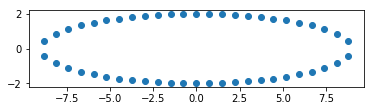

In [3]:
a = 2
b = 9
n = 50

phi = angles_in_ellipse(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b * np.sin(phi), a * np.cos(phi))
plt.show()

In [4]:
X= b * np.sin(phi)
Y= a * np.cos(phi)

<pre>
<font face='georgia'>
<i>
1. As a part of this assignment you will be working the regression problem and how regularization helps to get rid of outliers

2. Use the above created X, Y for this experiment.

3. to do this task you can either implement your own SGDRegression(prefered) excatly similar to "SGD assignment" with mean sequared error or 
you can use the SGDRegression of sklearn, for example "SGDRegressor(alpha=0.001, eta0=0.001, learning_rate='constant',random_state=0)" 
note that you have to use the constant learning rate and learning rate <b>eta0</b> initialized.

4. as a part of this experiment you will train your linear regression on the data (X, Y) with different regularizations alpha=[0.0001, 1, 100] and 
observe how prediction hyper plan moves with respect to the outliers

5. This the results of one of the experiment we did (title of the plot was not metioned intentionally) 
<img src='https://i.imgur.com/FctjBiD.png'> 
in each iteration we were adding single outlier and observed the movement of the hyper plane.

6. please consider this list of outliers: [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)] in each of tuple the first elemet 
is the input feature(X) and the second element is the output(Y)

7. for each regularizer, you need to add these outliers one at time to data and then train your model 
again on the updated data. 

8. you should plot a 3*5 grid of subplots,
 where each row corresponds to results of model with a single regularizer.

9. Algorithm: 

for each regularizer:
    for each outlier:
        #add the outlier to the data
        #fit the linear regression to the updated data
        #get the hyper plane
        #plot the hyperplane along with the data points

10. MAKE SURE YOU WRITE THE DETAILED OBSERVATIONS, PLEASE CHECK THE LOSS FUNCTION IN THE SKLEARN DOCUMENTATION
 (please do search for it).
</i>
</font>
</pre>

In [5]:
model=SGDRegressor(alpha=0.001, eta0=0.001, learning_rate='constant',random_state=0)
model.fit(X.reshape(-1,1),Y)
model.intercept_

array([-0.00171103])

In [6]:
x_coef=model.coef_
x_int=model.intercept_
xi=[]
for i in X:
    m=(i*x_coef)+x_int
    xi.append(m)
print(xi)

[array([-0.00171103]), array([0.00755836]), array([0.01682614]), array([0.02609054]), array([0.03534951]), array([0.04460045]), array([0.05383984]), array([0.06306254]), array([0.07226035]), array([0.08141871]), array([0.09050744]), array([0.09944489]), array([0.10781813]), array([0.10781813]), array([0.09944489]), array([0.09050744]), array([0.08141871]), array([0.07226035]), array([0.06306254]), array([0.05383984]), array([0.04460045]), array([0.03534951]), array([0.02609054]), array([0.01682614]), array([0.00755836]), array([-0.00171103]), array([-0.01098042]), array([-0.0202482]), array([-0.0295126]), array([-0.03877156]), array([-0.04802251]), array([-0.0572619]), array([-0.0664846]), array([-0.07568241]), array([-0.08484077]), array([-0.0939295]), array([-0.10286695]), array([-0.11124019]), array([-0.11124019]), array([-0.10286695]), array([-0.0939295]), array([-0.08484077]), array([-0.07568241]), array([-0.0664846]), array([-0.0572619]), array([-0.04802251]), array([-0.03877156]

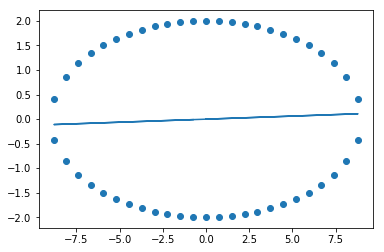

In [7]:
plt.scatter(X,Y)
plt.plot(X,xi)

In [8]:
#Outliers=[(0,2),(21, 13), (-23, -15), (22,14), (23, 14)]
reshaped_x=X.reshape(-1,1)
reshaped_x
np.append(reshaped_x,[[0]],axis=0)
np.append(Y,[0],axis=0)
print(np.array([]))

[]


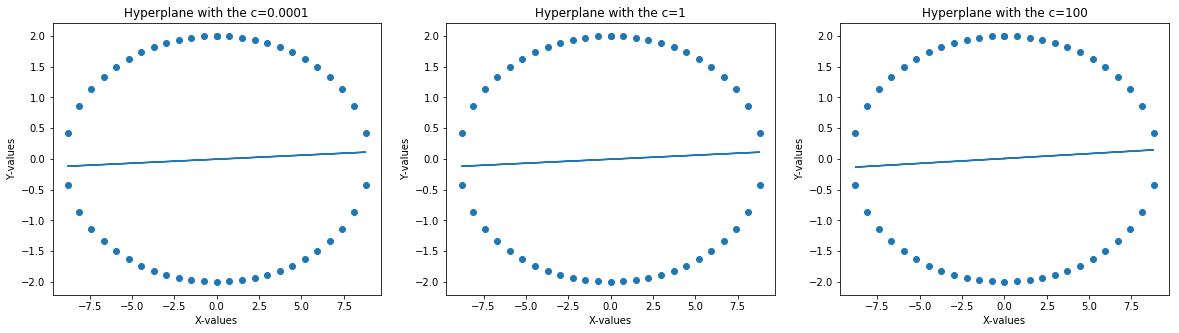

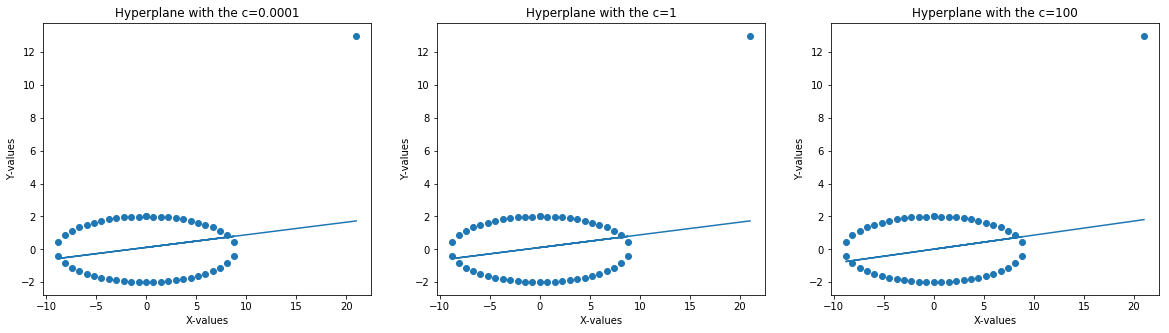

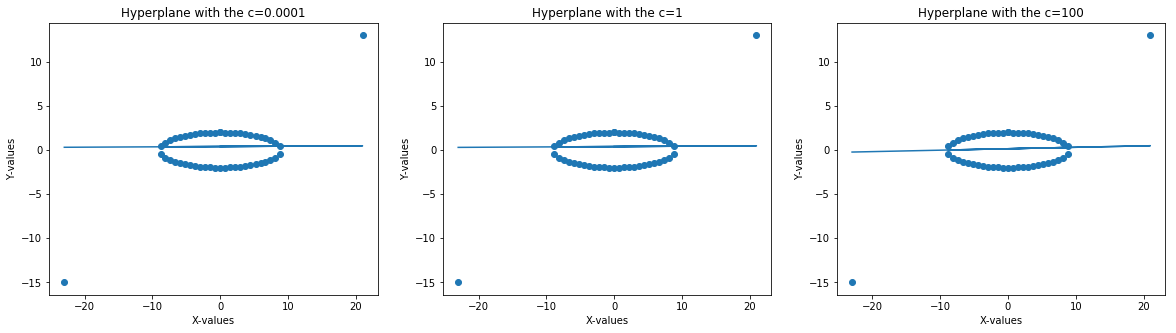

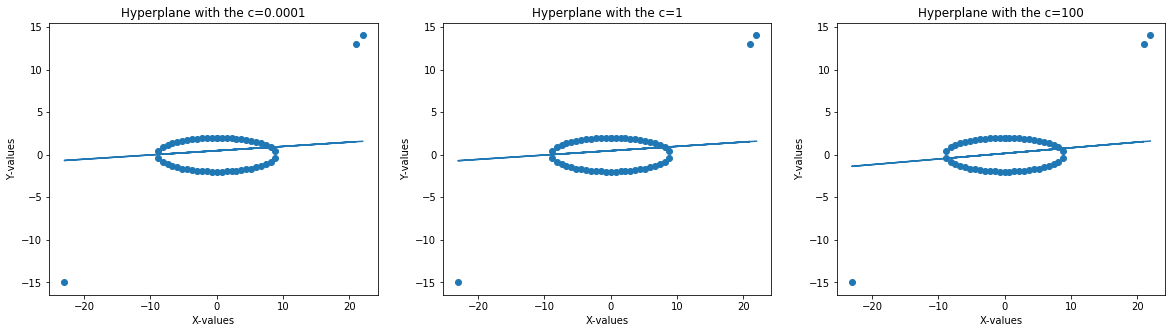

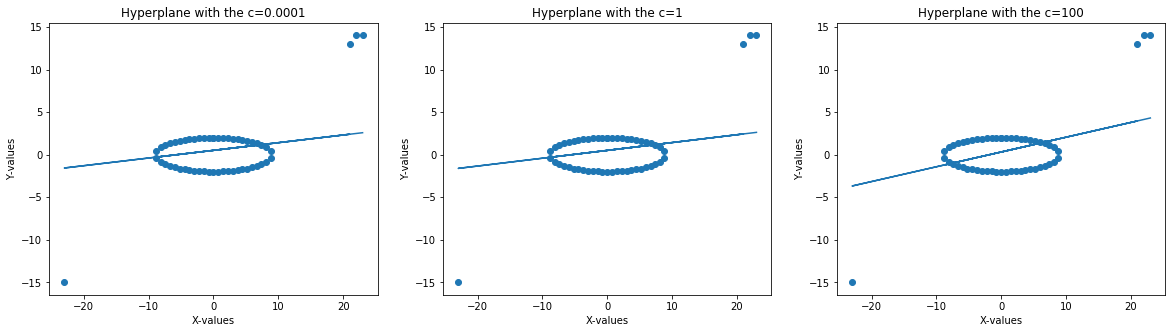

In [9]:
Outliers=[(0,2),(21, 13), (-23, -15), (22,14), (23, 14)]
c=[0.0001, 1, 100]
surfaces=[]
reshaped_x=X.reshape(-1,1).copy()
y_new=Y.copy()
for points in Outliers: 
    plt.figure(figsize=(20,5))
    x_o=points[0]
    y_o=points[1]
    reshaped_x=np.append(reshaped_x,[[x_o]],axis=0)
    y_new=np.append(y_new,[y_o], axis=0)
    reshaped_x.shape
    Y.shape
    for i,a in enumerate(c):
        plt.subplot(1,3,i+1)
        model=SGDRegressor(loss='squared_loss',alpha=a, eta0=0.001, learning_rate='constant',random_state=0)
        model.fit(reshaped_x,y_new)
        w=model.intercept_
        b=model.coef_
        surfaces.append([{'alpha':a},i+1,{'w':round(w[0],5)},{'b':round(b[0],5)}])
        y_hat=(reshaped_x*w +b)
        plt.title('Hyperplane with the c={}'.format(a))
        plt.xlabel('X-values')
        plt.ylabel('Y-values')
        plt.scatter(reshaped_x,y_new)
        plt.plot(reshaped_x,y_hat)
    plt.show()

In [10]:
for i in surfaces:
    j=i[1]
    print(i)
    if j==3:
        print('_'*60)
#the index 0,1,2 are the plots in a row

[{'alpha': 0.0001}, 1, {'w': 0.013}, {'b': -0.00487}]
[{'alpha': 1}, 2, {'w': 0.01301}, {'b': -0.00512}]
[{'alpha': 100}, 3, {'w': 0.01588}, {'b': 0.00656}]
____________________________________________________________
[{'alpha': 0.0001}, 1, {'w': 0.07666}, {'b': 0.11865}]
[{'alpha': 1}, 2, {'w': 0.07705}, {'b': 0.11354}]
[{'alpha': 100}, 3, {'w': 0.08551}, {'b': 0.0112}]
____________________________________________________________
[{'alpha': 0.0001}, 1, {'w': 0.00379}, {'b': 0.40514}]
[{'alpha': 1}, 2, {'w': 0.00407}, {'b': 0.39998}]
[{'alpha': 100}, 3, {'w': 0.01634}, {'b': 0.15248}]
____________________________________________________________
[{'alpha': 0.0001}, 1, {'w': 0.05006}, {'b': 0.46541}]
[{'alpha': 1}, 2, {'w': 0.05098}, {'b': 0.46118}]
[{'alpha': 100}, 3, {'w': 0.06598}, {'b': 0.14736}]
____________________________________________________________
[{'alpha': 0.0001}, 1, {'w': 0.09009}, {'b': 0.50401}]
[{'alpha': 1}, 2, {'w': 0.09202}, {'b': 0.50034}]
[{'alpha': 100}, 3, {'w'

### OBSERVATIONS:
- When there are no outliers, at all the learning rates, the Decision Surface is of the same inclination and value as well. This can be seen visually and also based on values, because the values are same till the first 2 decimals, there is just a small difference in after the 3rd decimal.

#### **Single  Outlier**
- When a **single outlier** is introduced to the Dataset, all the 3 Alpha's behave in a different manner:
- 1) We can see visually that c=100 seems to be more inclined towards the one outlier and also in the values the c=100 has w is 0.085 whereas for the other values of c it is similar and stays at 0.07.
- 2) So we can conclude that when the alpha value is high it can get easily get affected by outlier, but in this case c=1/0.001 seems to be the best value and hence selecting the correct hyperparameter is important.

####  **2 Outlier**
- When 2 Outliers are introduced into the data:
- 1) Visually all the Decision Surfaces seem to be not affected by the outlier, because the plane is not inclined specifically towards any outlier.
- 2) The values for W & b, show that again c=1 & c=0.0001 have a similar hyperplane, but c=100 has a different hyperplane as the values are very much different. 

#### **3 Outlier**
- When we have 3 outliers:
- 1) Again visually when we have 2 outliers on one end and 1 outlier on another end, the decision surface for c=0.0001 and c=1 have a similar surface but c=100 has a surface which is more inclined towards the 2 outliers

#### **4 Outlier**
- When we have 4 Outliers:
- 1) Here it is very clearly evident that when c=100, it is highly affected by the Outliers, whereas the c=0.0001 and 1 are least affected by the Outliers.

## Conclusion:
- This clearly shows the importance of selecting the correct hyperparameter, because inherently this value handles the outliers and does not let the decision surface be affected by the Outliers.
- Additionally this assignment has shown, how much an outlier can affect the decision surface of the model, hence affecting the performance of the model.